In [2]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from scipy.stats import zscore
from ydata_profiling import ProfileReport
from ipyvizzu import Chart, Data, Config
import dtale
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [3]:
#Read in the csv file and convert to a Pandas dataframe
#estate = pd.read_csv('data/realEstate.csv')
lands = pd.read_csv('../data/RiyadhAqqar/Lands.csv')
#villas = pd.read_csv('data/RiyadhAqqar/villas.csv')
#apartments = pd.read_csv('data/RiyadhAqqar/Apartments.csv')
#riyadh = pd.read_csv('data/RiyadhVillasAqar.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [4]:
#display(estate.head(2))
display(lands.head(2))
#display(villas.head(2))
#display(apartments.head(2))
#display(riyadh.head(2))

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
0,أرض,NaN,امارة منطقة الرياض,الرياض,غربية,375,2900.0,1087500
1,أرض,NaN,الرياض,حي غرناطة,شمالية,800,4800.0,3840000


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [5]:
lands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   نوع العقار      2155 non-null   object 
 1   الغرض           2106 non-null   object 
 2   المدينة         2155 non-null   object 
 3   الحي            2155 non-null   object 
 4   الواجهة         2155 non-null   object 
 5   المساحة         2155 non-null   int64  
 6   سعر المتر       2155 non-null   float64
 7   السعر الإجمالي  2155 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 134.8+ KB


In [6]:
lands.shape

(2155, 8)

In [7]:
lands.describe()

,المساحة,سعر المتر,السعر الإجمالي
count,2155.000000,2155.000000,2.155000e+03
mean,1568.780510,4356.648574,5.050271e+06
std,9757.996967,35214.809640,3.141799e+07
min,1.000000,90.000000,1.400000e+03
25%,413.000000,1365.000000,7.810000e+05
50%,670.000000,2570.000000,1.442000e+06
75%,900.000000,4000.000000,3.150000e+06
max,299684.000000,945000.000000,8.930250e+08


In [8]:
lands.columns

Index(['نوع العقار', 'الغرض', 'المدينة', 'الحي', 'الواجهة', 'المساحة',
       'سعر المتر', 'السعر الإجمالي'],
      dtype='object')

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

In [9]:
lands.head()

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
0,أرض,NaN,امارة منطقة الرياض,الرياض,غربية,375,2900.0,1087500
1,أرض,NaN,الرياض,حي غرناطة,شمالية,800,4800.0,3840000
2,أرض,سكني,الرياض,حي غرناطة,ثلاث شوارع,1650,4800.0,7920000
3,أرض,سكني,الرياض,حي اليرموك,ثلاث شوارع,1650,4800.0,7920000
4,أرض,سكني,الرياض,حي النسيم الغربي,غربية,750,3200.0,2400000


In [14]:
# Translate the column names
lands.columns = ['Property Type', 'Purpose', 'City', 'District', 'Frontage', 'Area', 'Price per Sq.M', 'Total Price']
print(lands.head())

  Property Type Purpose                 City            District    Frontage  \
0           أرض     NaN   امارة منطقة الرياض             الرياض        غربية   
1           أرض     NaN              الرياض           حي غرناطة       شمالية   
2           أرض    سكني              الرياض           حي غرناطة   ثلاث شوارع   
3           أرض    سكني              الرياض          حي اليرموك   ثلاث شوارع   
4           أرض    سكني              الرياض    حي النسيم الغربي        غربية   

   Area  Price per Sq.M  Total Price  
0   375          2900.0      1087500  
1   800          4800.0      3840000  
2  1650          4800.0      7920000  
3  1650          4800.0      7920000  
4   750          3200.0      2400000  


In [15]:
lands.head()

,Property Type,Purpose,City,District,Frontage,Area,Price per Sq.M,Total Price
0,أرض,NaN,امارة منطقة الرياض,الرياض,غربية,375,2900.0,1087500
1,أرض,NaN,الرياض,حي غرناطة,شمالية,800,4800.0,3840000
2,أرض,سكني,الرياض,حي غرناطة,ثلاث شوارع,1650,4800.0,7920000
3,أرض,سكني,الرياض,حي اليرموك,ثلاث شوارع,1650,4800.0,7920000
4,أرض,سكني,الرياض,حي النسيم الغربي,غربية,750,3200.0,2400000


In [16]:
lands['Property Type'].isnull().sum()

0

In [17]:
# replace the 49 nulls in 'Property Type'
lands['Property Type'] = lands['Property Type'].fillna('غير محدد')

In [18]:
lands['Property Type'].isnull().sum()

0

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [19]:
#kaggle usesr

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [20]:
# lands.drop(['نوع العقار'],axis=1,inplace=True)

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [21]:
lands.duplicated().sum()

259

In [22]:
lands[lands.duplicated()]

,Property Type,Purpose,City,District,Frontage,Area,Price per Sq.M,Total Price
13,أرض,تجاري وسكني,الرياض,حي اليرموك,جنوبية,1089,3300.0,3593700
19,أرض,تجاري وسكني,الرياض,حي اليرموك,جنوبية,1089,3200.0,3484800
34,أرض,سكني,امارة منطقة الرياض,الرياض,جنوبية,300,1950.0,585000
44,أرض,سكني,الرياض,حي الخليج,شمالية,300,2600.0,780000
50,أرض,سكني,الرياض,حي الحمراء,جنوبية,1000,6000.0,6000000
...,...,...,...,...,...,...,...,...
2063,أرض,سكني,الرياض,الرياض,شرقية,2450,2400.0,5880000
2096,أرض,سكني,الرياض,حي الروضة,جنوبية,627,4200.0,2633400
2116,أرض,سكني,الرياض,حي العارض,ثلاث شوارع,5450,4600.0,25070000
2125,أرض,تجاري,الرياض,حي المهدية,جنوبية,900,7600.0,6840000


In [23]:
lands.drop_duplicates(inplace=True)

In [24]:
lands.shape

(1896, 8)

In [25]:
# go to delete duplicates columns


#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [26]:
#Display number missing values per column
lands.isnull().sum().sort_values(ascending = False)

Purpose           47
Property Type      0
City               0
District           0
Frontage           0
Area               0
Price per Sq.M     0
Total Price        0
dtype: int64

In [27]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [28]:
# check columns types 
lands.dtypes

Property Type      object
Purpose            object
City               object
District           object
Frontage           object
Area                int64
Price per Sq.M    float64
Total Price         int64
dtype: object

In [29]:
lands.shape

(1896, 8)

In [30]:
# go to clean them 

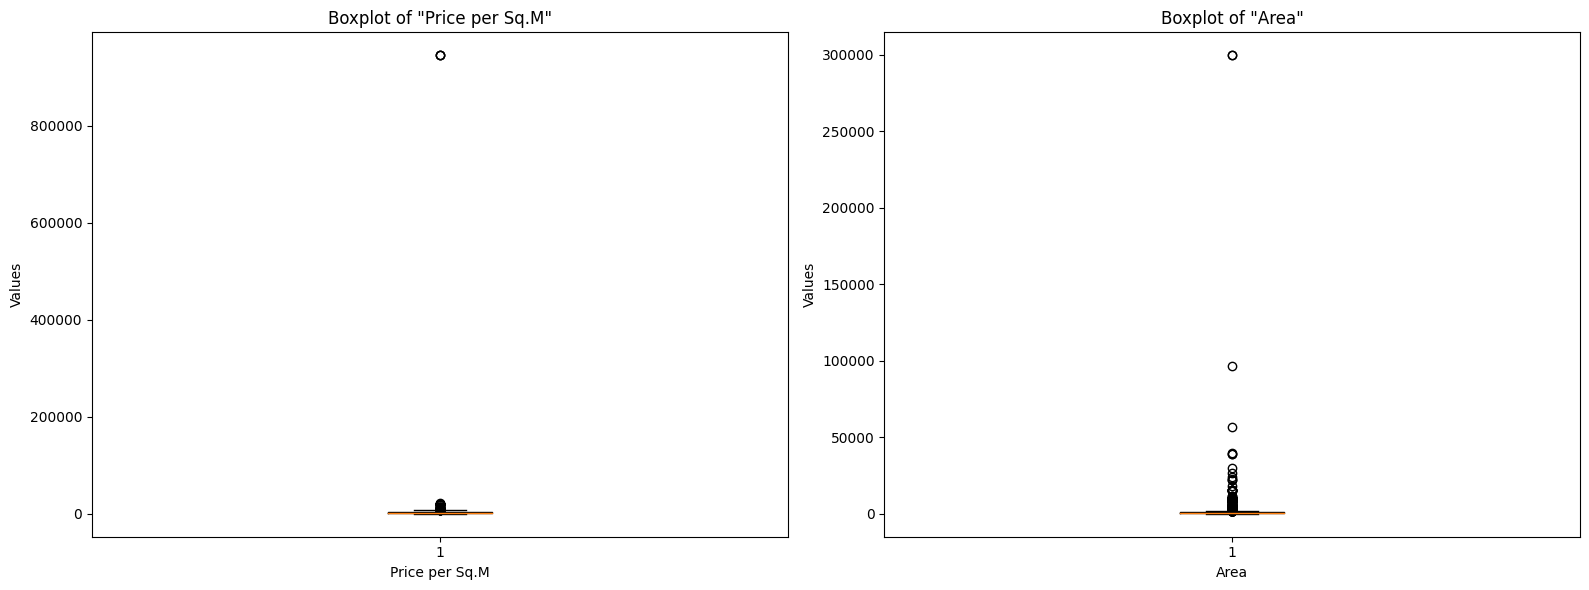

In [31]:
# check outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot for "Price per Sq.M"
ax1.boxplot(lands['Price per Sq.M'])
ax1.set_title('Boxplot of "Price per Sq.M"')
ax1.set_xlabel('Price per Sq.M')
ax1.set_ylabel('Values')

# Boxplot for "Area"
ax2.boxplot(lands['Area'])
ax2.set_title('Boxplot of "Area"')
ax2.set_xlabel('Area')
ax2.set_ylabel('Values')

plt.subplots_adjust(wspace=0.5)

plt.tight_layout()
plt.show()


In [32]:
print(lands.head())
print(lands.dtypes)

  Property Type Purpose                 City            District    Frontage  \
0           أرض     NaN   امارة منطقة الرياض             الرياض        غربية   
1           أرض     NaN              الرياض           حي غرناطة       شمالية   
2           أرض    سكني              الرياض           حي غرناطة   ثلاث شوارع   
3           أرض    سكني              الرياض          حي اليرموك   ثلاث شوارع   
4           أرض    سكني              الرياض    حي النسيم الغربي        غربية   

   Area  Price per Sq.M  Total Price  
0   375          2900.0      1087500  
1   800          4800.0      3840000  
2  1650          4800.0      7920000  
3  1650          4800.0      7920000  
4   750          3200.0      2400000  
Property Type      object
Purpose            object
City               object
District           object
Frontage           object
Area                int64
Price per Sq.M    float64
Total Price         int64
dtype: object


**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [33]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [34]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [35]:
# We droped this rows because they are in diff class of analysis so we don't need them
lands[lands["Price per Sq.M"] >= 90000]

,Property Type,Purpose,City,District,Frontage,Area,Price per Sq.M,Total Price
1545,أرض,تجاري وسكني,حريملاء,ملهم,شمالية شرقية,945,945000.0,893025000
1546,أرض,تجاري وسكني,حريملاء,الرياض,غربية,375,945000.0,354375000
1547,أرض,تجاري وسكني,الرياض,حي القيروان,غربية,900,945000.0,850500000


In [36]:
lands[lands["Price per Sq.M"] >= 90000].index

Index([1545, 1546, 1547], dtype='int64')

In [37]:
lands = lands.drop(lands[lands["Price per Sq.M"] >= 90000].index, axis=0)

In [38]:
# here we found a dublicated values with diff District names, so we gonna delete both of them 
lands[lands["Area"] >= 200000]

,Property Type,Purpose,City,District,Frontage,Area,Price per Sq.M,Total Price
2086,أرض,تجاري وسكني,الرياض,الرياض,أربع شوارع,299684,1450.0,434541800
2087,أرض,تجاري وسكني,الرياض,حي الرمال,أربع شوارع,299684,1450.0,434541800


In [39]:
lands[lands["Area"] >= 200000].index

Index([2086, 2087], dtype='int64')

In [40]:
lands = lands.drop(lands[lands["Area"] >= 200000].index, axis=0)

In [41]:
# Same idea there was some small areas that we don't gonna deal with it
lands[lands["Area"] < 300]

,Property Type,Purpose,City,District,Frontage,Area,Price per Sq.M,Total Price
37,أرض,سكني,امارة منطقة الرياض,الرياض,غربية,239,1950.0,466050
38,أرض,سكني,امارة منطقة الرياض,الرياض,جنوبية غربية,218,1650.0,359700
39,أرض,سكني,امارة منطقة الرياض,الرياض,غربية,239,1650.0,394350
95,أرض,سكني,الرياض,حي السعادة,جنوبية,90,2500.0,225000
212,أرض,سكني,امارة منطقة الرياض,الرياض,شمالية غربية,247,1650.0,407550
...,...,...,...,...,...,...,...,...
1831,أرض,سكني,امارة منطقة الرياض,الرياض,جنوبية,225,13395.0,3013875
1832,أرض,سكني,امارة منطقة الرياض,الرياض,جنوبية شرقية,225,13395.0,3013875
1895,أرض,سكني,الرياض,حي ام سليم,جنوبية شرقية,199,1800.0,358200
2020,أرض,تجاري,الرياض,حي جرير,شمالية,248,3200.0,793600


In [42]:
lands[lands["Area"] < 300].index

Index([  37,   38,   39,   95,  212,  213,  229,  231,  234,  265,  286,  292,
        293,  294,  322,  328,  331,  349,  360,  519,  522,  530,  541,  581,
        600,  663,  677,  774,  797,  918, 1172, 1181, 1188, 1232, 1268, 1328,
       1341, 1402, 1412, 1414, 1432, 1437, 1438, 1446, 1473, 1478, 1481, 1483,
       1485, 1487, 1534, 1541, 1548, 1576, 1581, 1594, 1595, 1633, 1661, 1668,
       1674, 1709, 1723, 1725, 1739, 1747, 1753, 1768, 1790, 1806, 1819, 1824,
       1827, 1831, 1832, 1895, 2020, 2128],
      dtype='int64')

In [43]:
lands = lands.drop(lands[lands["Area"] < 300].index, axis=0)

In [44]:
lands[lands["Area"] == ' ']

,Property Type,Purpose,City,District,Frontage,Area,Price per Sq.M,Total Price


In [45]:
lands['City'] = 'منطقة الرياض'

In [46]:
lands[lands["District"] == ' '].index

Index([192, 304, 990, 1051, 1052, 1263, 1520, 1664, 2101, 2102, 2121, 2122], dtype='int64')

In [47]:
lands = lands[~lands.index.isin([192, 304, 990, 1051, 1052, 1263, 1520, 1664, 2101, 2102, 2121, 2122])]

In [48]:
lands = lands.drop('City', axis=1)

In [49]:
lands.dropna(inplace=True)

In [50]:
# go to delete ouliers

In [51]:
lands['Price per Sq.M'] = lands['Price per Sq.M'].astype(int)

In [56]:
lands.columns = [['نوع العقار', 'الغرض', 'الحي', 'الواجهة', 'المساحة', 'سعر المتر', 'السعر الإجمالي']]

In [65]:
lands.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1759 entries, 2 to 2154
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   (نوع العقار,)      1759 non-null   object
 1   (الغرض,)           1759 non-null   object
 2   (الحي,)            1759 non-null   object
 3   (الواجهة,)         1759 non-null   object
 4   (المساحة,)         1759 non-null   int64 
 5   (سعر المتر,)       1759 non-null   int32 
 6   (السعر الإجمالي,)  1759 non-null   int64 
dtypes: int32(1), int64(2), object(4)
memory usage: 103.1+ KB


In [53]:
destate = dtale.show(lands)
destate.open_browser()

In [72]:
lands

,نوع العقار,الغرض,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
2,أرض,سكني,حي غرناطة,ثلاث شوارع,1650,4800,7920000
3,أرض,سكني,حي اليرموك,ثلاث شوارع,1650,4800,7920000
4,أرض,سكني,حي النسيم الغربي,غربية,750,3200,2400000
5,أرض,تجاري وسكني,حي الرمال,جنوبية,2400,3300,7920000
6,أرض,تجاري وسكني,حي الرمال,شمالية,900,3300,2970000
...,...,...,...,...,...,...,...
2150,أرض,تجاري,الرياض,جنوبية,2000,3500,7000000
2151,أرض,سكني,حي العريجاء الغربية,جنوبية,400,1500,600000
2152,أرض,تجاري وسكني,حي ظهرة لبن,جنوبية غربية,1050,2380,2499000
2153,أرض,تجاري وسكني,حي العريجاء الغربي,غربية,313,2000,626000


In [89]:
# Ensure the columns are one-dimensional and properly formatted
lands['الحي'] = lands['الحي'].astype(str)
lands['الغرض'] = lands['الغرض'].astype(str)

# Temporary DataFrame to avoid multi-index issues
temp = lands[["الحي", "الغرض"]].copy()
temp.columns = ["dis", "per"]

# Count the number of properties per حي and الغرض
counts = temp.groupby(['dis', 'per']).size().unstack(fill_value=0)

# Compute the total count and sort by it
counts['Total'] = counts.sum(axis=1)
counts = counts.nlargest(10, 'Total').sort_values(by='Total', ascending=True)
counts = counts.drop(columns='Total')

# Create traces for each value of 'الغرض'
traces = []
for purpose in counts.columns:
    traces.append(go.Bar(
        y=counts.index,
        x=counts[purpose],
        name=purpose,
        text=counts[purpose],
        textposition='inside',
        orientation='h'
    ))

# Create the figure
fig = go.Figure(data=traces)

# Update the layout
fig.update_layout(
    barmode='stack',
    title='(الحي vs الغرض) أفضل 10 أحياء حسب عدد العقارات',
    yaxis=dict(title='الحي'),
    xaxis=dict(title='Count'),
    hoverlabel=dict(bgcolor="white", font_size=16, font_family="Rockwell")
)

# Show the figure
fig.show()

In [107]:
lands['الحي'] = lands['الحي'].astype(str)
lands['المساحة'] = lands['المساحة'].astype(float)
#المساحة سعر المتر

temp = lands[["الحي", "المساحة"]].copy()
temp.columns = ["dis", "target"]

mean_area = temp.groupby('dis')['target'].mean().sort_values(ascending=False).reset_index().head(10)

fig = px.bar(mean_area, x='dis', y='target', labels={'dis': 'الحي', 'target': 'المساحة (متوسط بالمتر المربع)'}, title='الحي vs. متوسط المساحة')
fig.show()

2024-05-19 01:34:08,644 - INFO     - Executing shutdown due to inactivity...
2024-05-19 01:34:12,709 - INFO     - Executing shutdown...
2024-05-19 01:34:12,711 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [108]:
neighborhood_counts = lands['الحي'].value_counts()


sorted_neighborhoods = neighborhood_counts.sort_values(ascending=False).head(10)

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=sorted_neighborhoods.index, values=sorted_neighborhoods.values)])
fig.update_layout(
    title='نسبة عروض الأراضي لكل حي',
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    )
)

# Display the chart
fig.show()

In [54]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

df = pd.read_csv('cleaned/lands_cleaned.csv')

# Bar chart
# neighborhoods = df['الحي'].unique()
# fig = make_subplots(rows=len(neighborhoods), cols=1, subplot_titles=neighborhoods)
# for i, neighborhood in enumerate(neighborhoods):
#     neighborhood_data = df[df['الحي'] == neighborhood]
#     purpose_counts = neighborhood_data['الغرض'].value_counts()
#     fig.add_trace(
#         go.Bar(x=purpose_counts.index, y=purpose_counts.values),
#         row=i+1, col=1
#     )
# fig.update_layout(
#     title='Distribution of Land Purposes by Neighborhood',
#     xaxis_title='Land Purpose',
#     yaxis_title='Count',
#     height=len(neighborhoods)*400,
#     bargap=0.1
# )
# fig.show()

# Scatter plot
top_20_area = df.nlargest(20, 'المساحة')
top_20_price = df.nlargest(20, 'سعر المتر')

fig = px.scatter(top_20_area, x='المساحة', y='سعر المتر', title='Top 20 Land Area vs. Top 20 Price per Square Meter')
fig.update_layout(
    xaxis_title='Land Area',
    yaxis_title='Price per Square Meter',
    hovermode='closest'
)

fig.update_traces(
    hovertemplate='Neighborhood: %{text}<br>Land Area: %{x}<br>Price per Sq. Meter: %{y}',
    text=top_20_area['الحي']
)

top_1_area = top_20_area.iloc[0]
fig.add_annotation(
    x=top_1_area['المساحة'],
    y=top_1_area['سعر المتر'],
    text="natural outlier",
    showarrow=True,
    arrowhead=1,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="red"
)
fig.show()

# Pie chart
fig = px.pie(df, names='الغرض', title='Proportion of Land Purposes')
fig.show()

neighborhood_prices = df.groupby('الحي')['السعر الإجمالي'].mean().sort_values(ascending=False).head(15)
fig = px.bar(neighborhood_prices, title='Trend of Land Mean Prices by Neighborhood')
fig.update_layout(
    xaxis_title='Neighborhood',
    yaxis_title='Average Total Price'
)
fig.show()

# Heatmap

